# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import

In [2]:
df = pd.read_csv('./data/BodyFat.csv')
df = df.drop(columns=['IDNO'])

df['WEIGHT'] = df['WEIGHT'].transform(lambda x: x * 0.453592).round(1)
df['HEIGHT'] = df['HEIGHT'].transform(lambda x: x * 2.54).round(1)

df.to_csv('./data/BodyFat_SI.csv', index = False)

df.head(10)

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,12.6,1.0708,23,70.0,172.1,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,1.0853,22,78.6,183.5,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,1.0414,22,69.9,168.3,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,1.0751,26,83.8,183.5,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,1.0340,24,83.6,181.0,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,20.6,1.0502,24,95.4,189.9,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,19.0,1.0549,26,82.1,177.2,26.2,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,12.8,1.0704,25,79.8,184.2,23.6,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,5.1,1.0900,25,86.6,188.0,24.6,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,12.0,1.0722,23,89.9,186.7,25.8,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [3]:
df.insert(1, 'CALC_BODYFAT', (495 / df['DENSITY'] - 450).round(1))
df.insert(2, 'BODYFAT_DIFF', np.abs(df['CALC_BODYFAT'] - df['BODYFAT']).round(1))
df.insert(8, 'CALC_BMI', (df['WEIGHT'] / (df['HEIGHT']/100)**2).round(1))
df.insert(9, 'BMI_DIFF', np.abs(df['CALC_BMI'] - df['ADIPOSITY']).round(1))
df['BODYFAT'] = np.where(df['BODYFAT_DIFF'] >= 3.0, df['CALC_BODYFAT'], df['BODYFAT'])
df['ADIPOSITY'] = np.where(df['BMI_DIFF'] >= 3.0, df['CALC_BMI'], df['ADIPOSITY'])
df = df.drop(columns=['CALC_BODYFAT', 'BODYFAT_DIFF', 'CALC_BMI', 'BMI_DIFF'])
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df.to_csv('./data/BodyFat_cleaned.csv', index = False)
df.head(10)

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,12.6,1.0708,23,70.0,172.1,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,1.0853,22,78.6,183.5,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,1.0414,22,69.9,168.3,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,1.0751,26,83.8,183.5,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,1.0340,24,83.6,181.0,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,20.6,1.0502,24,95.4,189.9,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,19.0,1.0549,26,82.1,177.2,26.2,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,12.8,1.0704,25,79.8,184.2,23.6,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,5.1,1.0900,25,86.6,188.0,24.6,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,12.0,1.0722,23,89.9,186.7,25.8,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


array([[<AxesSubplot:title={'center':'BODYFAT'}>,
        <AxesSubplot:title={'center':'DENSITY'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>],
       [<AxesSubplot:title={'center':'HEIGHT'}>,
        <AxesSubplot:title={'center':'ADIPOSITY'}>,
        <AxesSubplot:title={'center':'NECK'}>,
        <AxesSubplot:title={'center':'CHEST'}>],
       [<AxesSubplot:title={'center':'ABDOMEN'}>,
        <AxesSubplot:title={'center':'HIP'}>,
        <AxesSubplot:title={'center':'THIGH'}>,
        <AxesSubplot:title={'center':'KNEE'}>],
       [<AxesSubplot:title={'center':'ANKLE'}>,
        <AxesSubplot:title={'center':'BICEPS'}>,
        <AxesSubplot:title={'center':'FOREARM'}>,
        <AxesSubplot:title={'center':'WRIST'}>]], dtype=object)

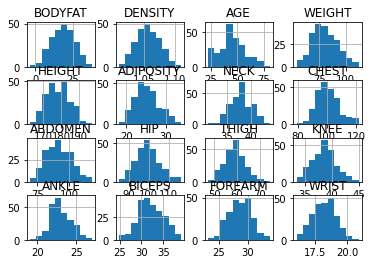

In [9]:
df.hist()

<AxesSubplot:>

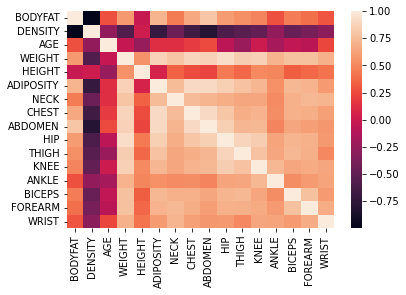

In [8]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)